In [1]:
#import dependencies
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
plt.style.use('bmh')

In [2]:
#load the restaurant price data 
from google.colab import files
uploaded = files.upload()

Saving restaurant-price.csv to restaurant-price.csv


In [15]:
#store the data into a dataframe
df = pd.read_csv('restaurant-price.csv')
df

,id,time,quantity,price
0,1,1,13,203
1,1,2,8,223
2,1,3,16,242
3,1,4,33,206
4,1,5,27,202
5,1,6,0,247
6,1,7,38,210
7,1,8,36,250
8,1,9,20,200
9,1,10,26,230


In [5]:
#get the number of hours
df.shape

(25, 4)

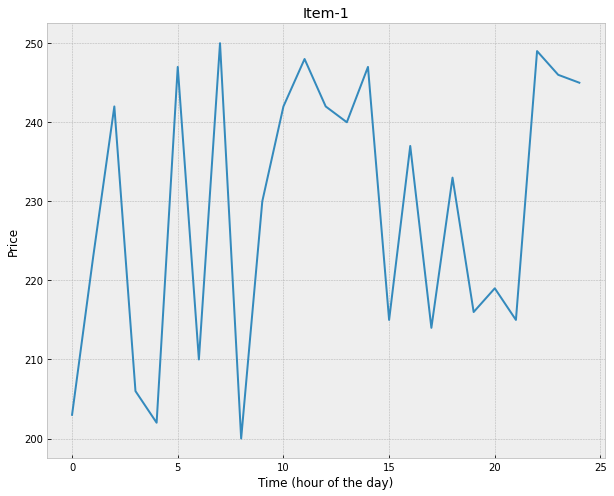

In [12]:
#visualise the price data
plt.figure(figsize=(10,8))
plt.title('Item-1')
plt.xlabel('Time (hour of the day)')
plt.ylabel('Price')
plt.plot(df['price'])
plt.show()

In [13]:
df = df[['price']]
df.head(5)

,price
0,203
1,223
2,242
3,206
4,202


In [34]:
#create a variable to predict future price at 'x' hours
future_hour = 10
#create a new column (target) shifted 'x' units up
df['Prediction'] = df[['price']].shift(-future_hour)
df

,id,time,quantity,price,Prediction
0,1,1,13,203,242.0
1,1,2,8,223,248.0
2,1,3,16,242,242.0
3,1,4,33,206,240.0
4,1,5,27,202,247.0
5,1,6,0,247,215.0
6,1,7,38,210,237.0
7,1,8,36,250,214.0
8,1,9,20,200,233.0
9,1,10,26,230,216.0


In [35]:
#crerate feature dataset and convert it into numpy array
X = np.array(df.drop(['Prediction','id','time','quantity'],1))[:-future_hour]
print(X)

[[203]
 [223]
 [242]
 [206]
 [202]
 [247]
 [210]
 [250]
 [200]
 [230]
 [242]
 [248]
 [242]
 [240]
 [247]]


In [36]:
#create target dataset
y = np.array(df['Prediction'])[:-future_hour]
print(y)

[242. 248. 242. 240. 247. 215. 237. 214. 233. 216. 219. 215. 249. 246.
 245.]


In [37]:
#split the data into 75% training na d25% testing
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [38]:
#Decision tree regressor model
tree = DecisionTreeRegressor().fit(x_train, y_train)

#linear regression model
lr = LinearRegression().fit(x_train, y_train)

In [40]:
#get 'x' rows of the feature datset
x_future = df.drop(['Prediction','id','time','quantity'],1)[:-future_hour]
x_future = x_future.tail(future_hour)
x_future = np.array(x_future)
x_future

array([[247],
       [210],
       [250],
       [200],
       [230],
       [242],
       [248],
       [242],
       [240],
       [247]])

In [42]:
#show tree model prediction
tree_prediction = tree.predict(x_future)
print(tree_prediction)
print()
#show linear regression model prediction
lr_prediction = lr.predict(x_future)
print(lr_prediction)

[245.         240.         214.         233.         216.
 236.66666667 215.         236.66666667 236.66666667 245.        ]

[227.94747162 237.79810114 227.14877193 240.46043344 232.47343653
 229.27863777 227.68123839 229.27863777 229.81110423 227.94747162]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


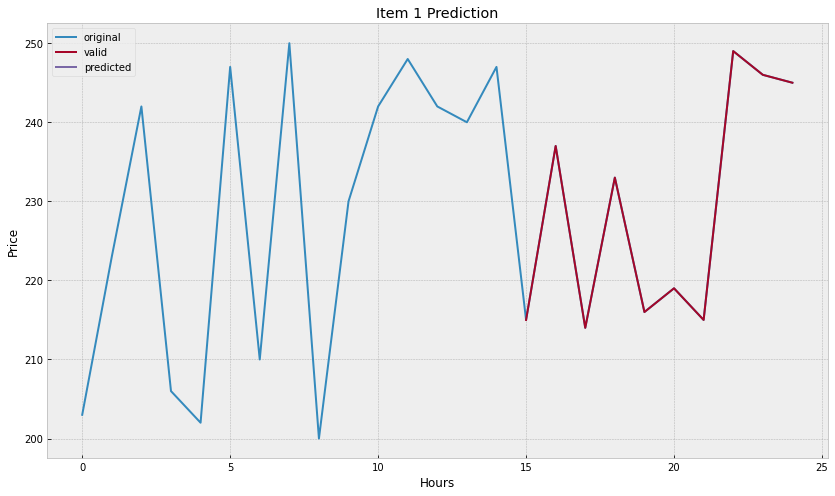

In [47]:
#visualize the data
predictions = tree_prediction
valid = df[X.shape[0]:]
valid['Predictions'] = predictions
plt.figure(figsize=(14,8))
plt.title('Item 1 Prediction')
plt.xlabel('Hours')
plt.ylabel('Price')
plt.plot(df['price'])
plt.plot(valid[['price', 'Prediction']])
plt.legend(['original','valid','predicted'])
plt.show()